In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import torch
from PIL import Image

path = os.getcwd()
if path.split('/')[-1] == 'notebooks':
    os.chdir('..')

In [2]:
from src.engine import Engine
from src.utils.util import *

# Load a model

In [3]:
config_path = 'configs/mln_resnet18_oxfordpets.yml'
save_dir = '/home/yo0n/바탕화면/RIL/ucam/notebook_test'
logger = load_log(save_dir)
checkpoint_path = '/home/yo0n/바탕화면/RIL/ucam/ckpt/checkpoint_best.pth'

In [4]:
engine = Engine(config_path, logger, save_dir,device='cuda')
engine.model_config['checkpoint_path'] = checkpoint_path
engine.define()


[2021-07-17 22:03:40,702 - /home/yo0n/바탕화면/RIL/ucam/notebook_test] GPU is available.


Build a dataloader
train
val
test
Build a model


[2021-07-17 22:03:43,794 - /home/yo0n/바탕화면/RIL/ucam/notebook_test] SGD opimizer is built.
[2021-07-17 22:03:43,795 - /home/yo0n/바탕화면/RIL/ucam/notebook_test] SGD opimizer is built.
[2021-07-17 22:03:43,796 - /home/yo0n/바탕화면/RIL/ucam/notebook_test] SGD opimizer is built.
[2021-07-17 22:03:43,796 - /home/yo0n/바탕화면/RIL/ucam/notebook_test] CUSTOM scheduler is built.
[2021-07-17 22:03:43,797 - /home/yo0n/바탕화면/RIL/ucam/notebook_test] Criterion is built.
[2021-07-17 22:03:43,798 - /home/yo0n/바탕화면/RIL/ucam/notebook_test] Loss meter is built.
[2021-07-17 22:03:43,798 - /home/yo0n/바탕화면/RIL/ucam/notebook_test] Checkpointer is built.
[2021-07-17 22:03:43,799 - /home/yo0n/바탕화면/RIL/ucam/notebook_test] Loading checkpoint from /home/yo0n/바탕화면/RIL/ucam/ckpt/checkpoint_best.pth
[2021-07-17 22:03:43,850 - /home/yo0n/바탕화면/RIL/ucam/notebook_test] Localizer is built.
[2021-07-17 22:03:43,851 - /home/yo0n/바탕화면/RIL/ucam/notebook_test] Evaluators are built.


In [5]:
cat_and_dog =img = Image.open("./data/notebook/cat_and_dog.png")
cat_and_dog = cat_and_dog.resize((224, 224), Image.ANTIALIAS)
plt.imshow(cat_and_dog)

In [6]:
inp = np.array(cat_and_dog)/255. - np.array((0.5,0.5,0.5))
inp = torch.tensor(inp)
plt.imshow(inp)
inpt = inp.permute(2,0,1).unsqueeze(0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [7]:
engine.dataloaders['train'].dataset.class2idx

{'leonberger': 0,
 'Bombay': 1,
 'Bengal': 2,
 'pug': 3,
 'British_Shorthair': 4,
 'english_setter': 5,
 'miniature_pinscher': 6,
 'english_cocker_spaniel': 7,
 'shiba_inu': 8,
 'saint_bernard': 9,
 'Sphynx': 10,
 'Siamese': 11,
 'pomeranian': 12,
 'basset_hound': 13,
 'Persian': 14,
 'staffordshire_bull_terrier': 15,
 'samoyed': 16,
 'Russian_Blue': 17,
 'havanese': 18,
 'boxer': 19,
 'great_pyrenees': 20,
 'newfoundland': 21,
 'Maine_Coon': 22,
 'yorkshire_terrier': 23,
 'Egyptian_Mau': 24,
 'japanese_chin': 25,
 'Abyssinian': 26,
 'american_pit_bull_terrier': 27,
 'Ragdoll': 28,
 'keeshond': 29,
 'chihuahua': 30,
 'american_bulldog': 31,
 'scottish_terrier': 32,
 'german_shorthaired': 33,
 'beagle': 34,
 'Birman': 35,
 'wheaten_terrier': 36}

In [8]:
from src.utils.util import *

label_name = list(engine.dataloaders['train'].dataset.class2idx)

engine.model.eval()
output_dict = engine.model(inpt.cuda().float())

sel_out = mln_gather(output_dict)

for i in range(21):
    second_pi_ind = torch.topk(output_dict['pi'],2)[-1][-1][-1]
    print(label_name[i], " : ",  sel_out['mu_sel'][0,i].item(), " " , output_dict['mu'][0,second_pi_ind,i].item())

leonberger  :  0.0023872016463428736   0.0010171971516683698
Bombay  :  4.106633787159808e-05   0.00019266117305960506
Bengal  :  8.970409908215515e-06   0.00011846181587316096
pug  :  3.21349325531628e-05   0.00020676307030953467
British_Shorthair  :  1.000137103801535e-06   2.695815419428982e-05
english_setter  :  5.42145935469307e-05   0.00014356672181747854
miniature_pinscher  :  7.862735401431564e-06   5.2691630116896704e-05
english_cocker_spaniel  :  0.016570646315813065   0.001769829890690744
shiba_inu  :  4.304014873923734e-05   0.00015346099098678678
saint_bernard  :  0.0003009131469298154   0.00025958570768125355
Sphynx  :  0.00017711936379782856   0.00023726947256363928
Siamese  :  0.00010417350858915597   0.0002487053570803255
pomeranian  :  2.9417551559163257e-05   0.00020738851162604988
basset_hound  :  0.00031564850360155106   0.0003313407942187041
Persian  :  5.226264420343796e-06   3.151821147184819e-05
staffordshire_bull_terrier  :  0.016411064192652702   0.0018741844

In [9]:
output_dict['mu'][0,torch.argmax(output_dict['pi'])]

tensor([2.3872e-03, 4.1066e-05, 8.9704e-06, 3.2135e-05, 1.0001e-06, 5.4215e-05,
        7.8627e-06, 1.6571e-02, 4.3040e-05, 3.0091e-04, 1.7712e-04, 1.0417e-04,
        2.9418e-05, 3.1565e-04, 5.2263e-06, 1.6411e-02, 1.2080e-04, 5.4736e-07,
        5.9424e-06, 8.0806e-05, 2.9901e-05, 7.1669e-06, 4.0593e-01, 1.1755e-03,
        2.6191e-04, 5.6659e-04, 4.9146e-01, 3.5214e-04, 2.3907e-02, 1.5419e-04,
        1.3721e-05, 1.8603e-02, 5.4615e-04, 1.9714e-02, 5.6845e-05, 1.0233e-04,
        6.5137e-05, 7.1703e-06, 4.5117e-06, 3.8109e-06, 7.9218e-06, 3.0102e-06,
        4.1671e-06, 6.4489e-06, 4.6718e-06, 8.6137e-06, 5.8476e-06, 4.1799e-06,
        4.3136e-06, 4.9549e-06, 3.8631e-06, 5.8417e-06, 5.6386e-06, 7.0581e-06,
        6.4906e-06, 4.9340e-06, 5.6217e-06, 5.8173e-06, 9.2431e-06, 5.8886e-06,
        4.6986e-06, 5.5472e-06, 3.1607e-06, 6.6829e-06, 3.2120e-06, 9.1598e-06,
        2.5975e-06, 4.1442e-06, 7.6474e-06, 5.7144e-06, 3.4848e-06, 5.5031e-06,
        6.5344e-06, 7.0245e-06, 6.7658e-

In [10]:
torch.topk(output_dict['pi'],2)[-1]

tensor([[1, 9]], device='cuda:0')

Abyssinian tensor(0.4915)
Maine_Coon tensor(0.4059)
Ragdoll tensor(0.0239)
{'epis': tensor([0.3836], device='cuda:0'), 'alea': tensor([1.1173], device='cuda:0')}


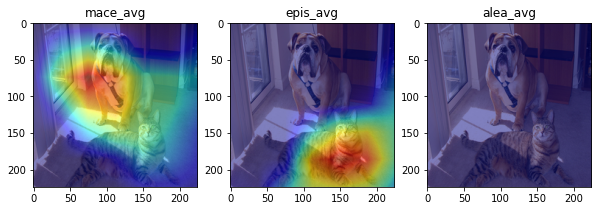

In [11]:
from src.core.criterions import *

%matplotlib inline

loss_types = ['mace_avg','epis_avg','alea_avg']

with torch.no_grad():
    output_dict = engine.model(inpt.cuda().float())
pi, mu, sigma = output_dict['pi'],output_dict['mu'],output_dict['sigma']
unct_out = mln_uncertainties(pi, mu, sigma)
sel_out = mln_gather(output_dict)
mu_sel = sel_out['mu_sel'].cpu()
ind_sel = torch.topk(mu_sel,3)[-1][0]

for pred in ind_sel:
    print(label_name[pred], mu_sel[0][pred])
print(unct_out)

plt.figure(figsize=(10,30))
for i,loss_type in enumerate(loss_types):
        
    engine.localizer.register_hooks()
    engine.localizer.model_ext.loss_type= loss_type
    
    cat_label = torch.tensor([ind_sel[0]]).long()
    
    cams = engine.localizer.localize(inpt.to('cuda').float(), cat_label.to('cuda'))
    cams = cams.cpu().detach().squeeze().numpy()
    
    plt.subplot(3,3,i+1)
    plt.title(loss_type)
    plt.imshow(cat_and_dog)
    plt.imshow(cams, alpha=0.5, cmap='jet')


tensor([5.4356e-04, 6.7149e-03, 7.8734e-01, 5.6788e-03, 5.2725e-05, 1.9662e-04,
        8.0001e-05, 8.0120e-05, 1.9770e-04, 2.0092e-04, 2.5961e-03, 1.2686e-05,
        9.0442e-04, 5.9313e-04, 3.3445e-05, 4.3582e-04, 5.6671e-05, 8.7836e-05,
        2.0730e-02, 1.4301e-02, 1.2283e-04, 3.3620e-04, 5.5051e-03, 5.0732e-05,
        2.1483e-05, 1.4620e-03, 1.9532e-04, 4.8883e-06, 1.9532e-05, 5.3036e-05,
        8.1261e-03, 6.2295e-06, 4.1932e-04, 8.5257e-05, 1.4058e-01, 1.1012e-04,
        1.0852e-03, 1.5359e-05, 1.0917e-05, 1.5950e-05, 1.2567e-05, 1.4478e-05,
        1.2938e-05, 1.3769e-05, 1.2649e-05, 1.6601e-05, 1.1901e-05, 1.6488e-05,
        1.5048e-05, 1.6158e-05, 1.7655e-05, 1.6061e-05, 1.5844e-05, 1.9826e-05,
        1.5406e-05, 1.2476e-05, 1.3614e-05, 1.1634e-05, 1.3951e-05, 1.4400e-05,
        1.6463e-05, 1.5659e-05, 1.7708e-05, 2.0476e-05, 1.9033e-05, 1.5524e-05,
        1.6509e-05, 1.2969e-05, 1.7857e-05, 1.5914e-05, 2.0120e-05, 1.2839e-05,
        1.6285e-05, 1.9056e-05, 1.0534e-

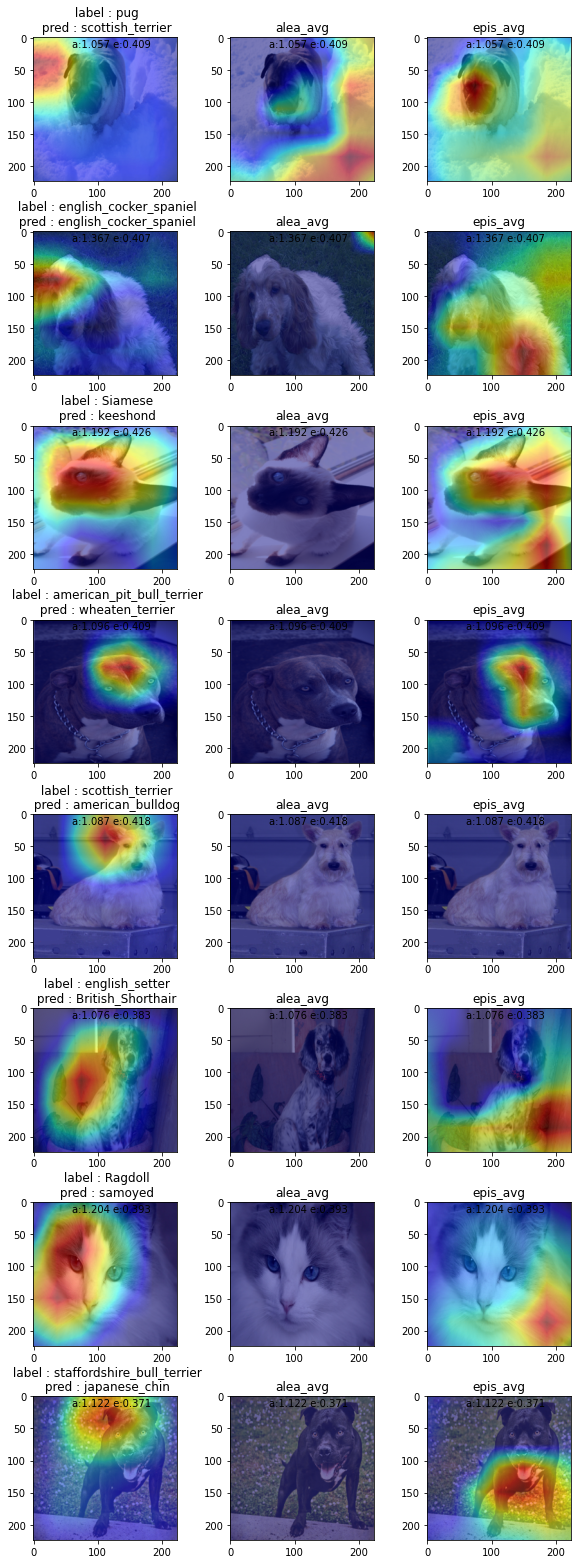

In [13]:
import random 

loss_types = ['mace_avg','alea_avg','epis_avg']

img,label,_ = iter(engine.dataloaders['train']).next()
bs = img.shape[0]
with torch.no_grad():
    output_dict = engine.model(img.cuda())
pi, mu, sigma = output_dict['pi'],output_dict['mu'],output_dict['sigma']
unct_out = mln_uncertainties(pi, mu, sigma)
sel_out = mln_gather(output_dict)
mu_sel = sel_out['mu_sel']
ind_sel = torch.topk(mu_sel,3,dim=-1)[-1]

print(mu_sel[1], label[1])

plt.figure(figsize=(10,80))
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)
l = [i for i in range(bs)]
random.shuffle(l)

for j,ind in enumerate(l[:8]):
    for i,loss_type in enumerate(loss_types):
        
        engine.model.eval()
        engine.localizer.register_hooks()
        engine.localizer.model_ext.loss_type= loss_type
        
        pred_label = torch.tensor([ind_sel[ind,0]]).long()
        
        cams = engine.localizer.localize(img[ind].unsqueeze(0).to('cuda').float(), pred_label.to('cuda'))
        cams = cams.cpu().detach().squeeze().numpy()
        
        epis = unct_out['epis'][j]
        alea = unct_out['alea'][j]
        
        plt.subplot(8*3,3,3*j+i+1)
        if(i==0):
            plt.title(" label : " + label_name[label[ind]] +  "\n pred : " + label_name[pred_label[0]])
        else:
            plt.title(loss_type)
        plt.imshow(img[ind].permute(1,2,0) + torch.tensor([0.5,0.5,0.5]))
        plt.imshow(cams, alpha=0.5, cmap='jet')
        plt.text(60, 15, "a:{:.3f} e:{:.3f}".format(alea,epis), fontsize=10)

## Mask Out

In [16]:
import numpy as np

loss_types = ['mace_avg','alea_avg','epis_avg']

confusion_matrix = np.zeros((21,3))
total_images = 0

for i, (images, labels, seglabel) in enumerate(engine.dataloaders['val']):
    total_images += images.size(0)
    
    for i,loss_type in enumerate(loss_types):
        engine.localizer.register_hooks()
        engine.localizer.model_ext.loss_type= loss_type
        
        cams = engine.localizer.localize(images.to('cuda'), labels.to('cuda')) # [B X 1 X W X H]
        
        masks = cams > cams.mean(dim=[1,2,3]).view(-1,1,1,1) # [B X 1 X W X H]
        cams = cams.detach().cpu().numpy() # [B X 1 X W X H]
        masks = masks.detach().cpu().numpy()
        
        seglabel = np.where(seglabel==255, 0, seglabel)

        for b in range(images.size(0)):
            for c in range(21):
                union = np.bitwise_or(masks[b].squeeze(),seglabel[b].squeeze()==c)
                intersection = np.bitwise_and(masks[b].squeeze(),seglabel[b].squeeze()==c)
                
                if np.sum(union)==0:
                    confusion_matrix[c,i] += 0
                else:
                    confusion_matrix[c,i] += np.sum(intersection)/np.sum(union)

tensor([19, 23,  0,  6, 22,  0, 34, 25, 30, 28, 28, 28, 31,  8,  1,  6,  1, 26,
        15,  8,  3, 13, 20, 33,  5,  6, 33,  7,  0,  4, 18, 25, 11, 26,  8, 12,
        26,  9,  1, 26, 23, 17, 19, 19, 15, 21,  8,  1, 14, 12,  9,  2, 24, 29,
        21, 33,  3, 12,  5, 31, 36,  5, 30, 31])
tensor([19, 23,  0,  6, 22,  0, 34, 25, 30, 28, 28, 28, 31,  8,  1,  6,  1, 26,
        15,  8,  3, 13, 20, 33,  5,  6, 33,  7,  0,  4, 18, 25, 11, 26,  8, 12,
        26,  9,  1, 26, 23, 17, 19, 19, 15, 21,  8,  1, 14, 12,  9,  2, 24, 29,
        21, 33,  3, 12,  5, 31, 36,  5, 30, 31])
tensor([19, 23,  0,  6, 22,  0, 34, 25, 30, 28, 28, 28, 31,  8,  1,  6,  1, 26,
        15,  8,  3, 13, 20, 33,  5,  6, 33,  7,  0,  4, 18, 25, 11, 26,  8, 12,
        26,  9,  1, 26, 23, 17, 19, 19, 15, 21,  8,  1, 14, 12,  9,  2, 24, 29,
        21, 33,  3, 12,  5, 31, 36,  5, 30, 31])
tensor([32, 16,  2, 25, 27, 25, 19, 26, 14, 15, 14, 33, 30,  2, 34, 32, 16, 32,
        29,  9, 29, 23, 23, 30, 23,  9, 27,  3, 16,  

KeyboardInterrupt: 

In [ ]:
alea_diff =list()
epis_diff = list()
for i in range(len(epis_mask)):
    alea_diff.append(alea_origin[i]-alea_mask[i])
    epis_diff.append(epis_origin[i]-epis_mask[i])

In [ ]:
sum(alea_diff)/len(alea_diff),sum(epis_diff)/len(epis_diff)

In [ ]:
for i in range(len(epis_mask)):
    print(result_before['epis'][i], epis_mask[i])